In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
#READING THE DATA
tele = pd.read_excel("Telecom Churn data.xlsx")

In [98]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [36]:
tele.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
tele.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [38]:
tele.shape

(3333, 21)

In [99]:
tele_df = tele.drop(['Phone','Account Length'] , axis=1)

In [40]:
tele['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

# Visualising The outliers using Boxplot

# Boxplot Using matplot

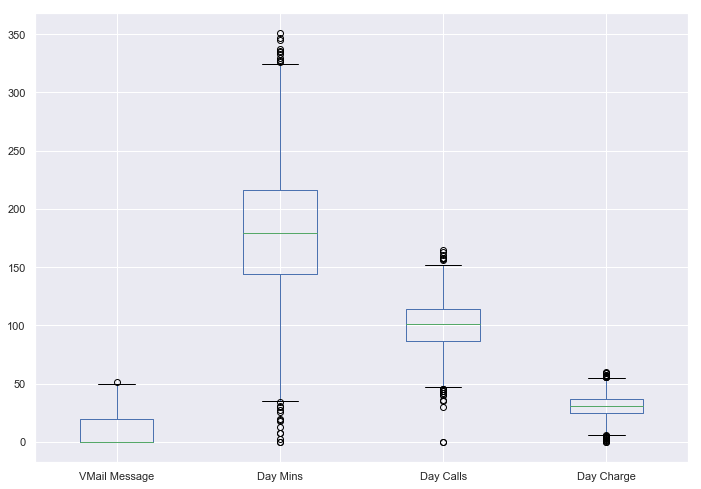

In [206]:

boxplot = tele_df.boxplot(column = ['VMail Message','Day Mins','Day Calls','Day Charge'])

# Boxplot Using SeaBorn

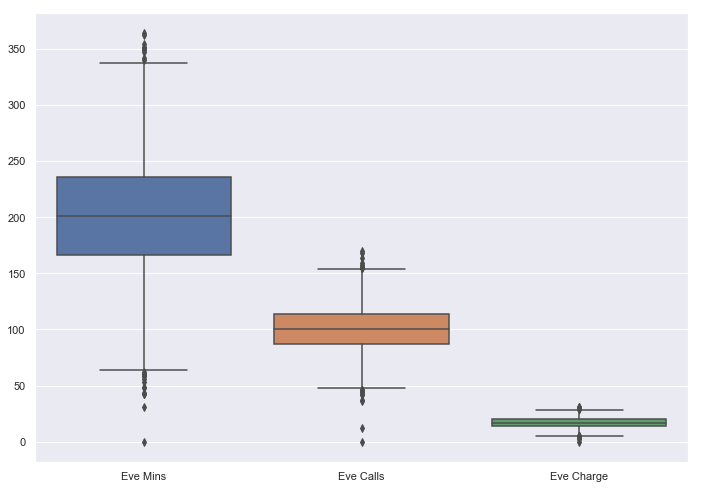

In [207]:
sns.set_style("whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=tele_df.iloc[:,9:12])


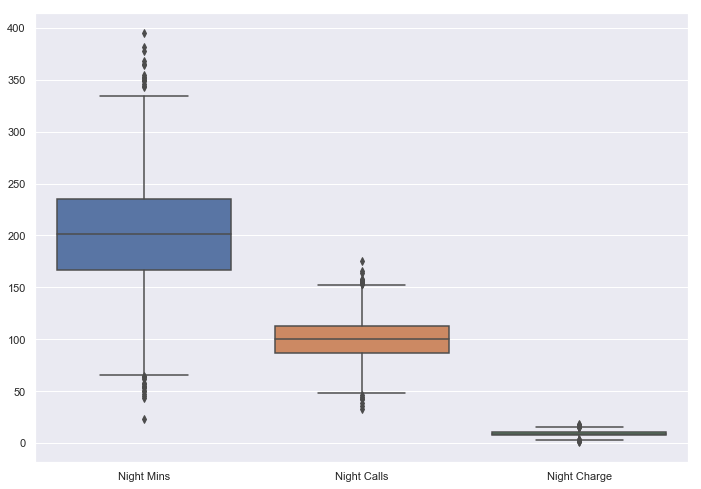

In [208]:
sns.set_style("whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=tele_df.iloc[:,12:15])


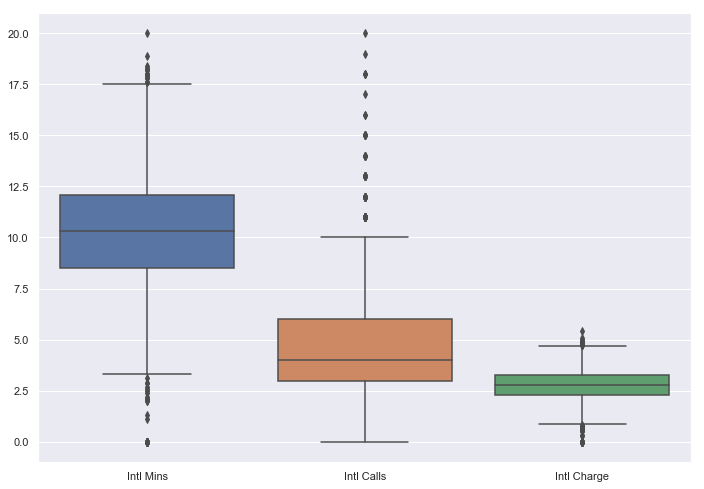

In [209]:
sns.set_style("whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=tele_df.iloc[:,15:18])


# Calculating Z-Score

In [103]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(tele_df.iloc[:,5:18]))
#z = np.abs(stats.zscore(tele_df))
print(z)


[[1.56676695 0.47664315 1.56703625 ... 0.60119509 0.0856905  0.42793202]
 [0.33373776 1.12450284 0.33401297 ... 0.60119509 1.2411686  0.42793202]
 [1.16830364 0.67598459 1.168464   ... 0.21153386 0.69715637 1.1882185 ]
 ...
 [0.01881963 0.42680779 0.01919334 ... 0.61789834 1.3871231  0.33235445]
 [0.62477766 0.22746635 0.62515277 ... 2.24335625 1.87695028 0.33235445]
 [1.00304237 0.62614923 1.00320234 ... 0.19483061 1.2411686  1.1882185 ]]


 #These data points which are way too far from mean will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [104]:
threshold = 3
#print(np.where(z > 3))
x = np.where(z>3)[0]  #these gives the row no's which have outliers in the form of array

#np.where(z>3)

In [105]:
x

array([  22,   32,   32,   41,   58,  115,  115,  179,  179,  182,  185,
        219,  244,  244,  272,  301,  314,  314,  329,  332,  343,  343,
        365,  365,  377,  468,  474,  483,  488,  488,  493,  504,  514,
        522,  533,  533,  542,  595,  595,  636,  642,  646,  674,  692,
        694,  712,  712,  721,  740,  756,  762,  762,  778,  821,  821,
        837,  854,  863,  878,  878,  883,  883,  883,  889,  889,  902,
        908,  921,  922,  922,  957,  960,  974,  982,  985,  985, 1021,
       1028, 1028, 1052, 1052, 1080, 1080, 1092, 1113, 1113, 1121, 1142,
       1144, 1179, 1233, 1233, 1260, 1260, 1273, 1317, 1317, 1325, 1333,
       1345, 1345, 1345, 1355, 1392, 1397, 1397, 1397, 1400, 1400, 1407,
       1419, 1445, 1445, 1502, 1564, 1564, 1567, 1615, 1638, 1694, 1831,
       1865, 1889, 1912, 1919, 1986, 1986, 1989, 2001, 2212, 2223, 2269,
       2288, 2321, 2321, 2327, 2331, 2331, 2345, 2345, 2362, 2362, 2380,
       2387, 2428, 2513, 2513, 2551, 2551, 2553, 25

All the above values are outliers , so we need to correct them

In [213]:
threshold = 3
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


In [214]:
print(z[22][11])

5.900636535359763


# Now remove all the rows having outliers 
#[from entire datset]

In [106]:
tele_df = tele_df.drop(index = x , axis = 0)

In [107]:
tele_df.shape #After removing outliers

(3179, 19)

In [108]:
tele_df.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# CHECKING IF THERE ARE ANY CORELATION

In [109]:
d = pd.DataFrame(data = tele_df , columns = list(tele_df.iloc[:,6:18] ))

In [110]:
d.corr() #This will print the corelation coefficient(r) value 

,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Day Calls,1.000000,0.001260,-0.007807,0.009834,-0.007803,0.016983,-0.016559,0.016973,0.014385,0.007245,0.014504,-0.020169
Day Charge,0.001260,1.000000,0.005417,0.027828,0.005405,0.002834,0.019635,0.002813,-0.020330,-0.002721,-0.020285,0.002820
Eve Mins,-0.007807,0.005417,1.000000,-0.026097,1.000000,-0.017407,-0.001731,-0.017424,-0.011630,0.011687,-0.011635,-0.026471
Eve Calls,0.009834,0.027828,-0.026097,1.000000,-0.026091,0.009356,0.007815,0.009392,0.007241,0.006801,0.007232,-0.005716
Eve Charge,-0.007803,0.005405,1.000000,-0.026091,1.000000,-0.017419,-0.001722,-0.017436,-0.011638,0.011690,-0.011643,-0.026475
Night Mins,0.016983,0.002834,-0.017407,0.009356,-0.017419,1.000000,0.009710,0.999999,-0.016547,0.012887,-0.016555,-0.013656
Night Calls,-0.016559,0.019635,-0.001731,0.007815,-0.001722,0.009710,1.000000,0.009696,-0.003554,0.003107,-0.003579,-0.014710
Night Charge,0.016973,0.002813,-0.017424,0.009392,-0.017436,0.999999,0.009696,1.000000,-0.016553,0.012911,-0.016561,-0.013638
Intl Mins,0.014385,-0.020330,-0.011630,0.007241,-0.011638,-0.016547,-0.003554,-0.016553,1.000000,-0.001354,0.999992,-0.001117
Intl Calls,0.007245,-0.002721,0.011687,0.006801,0.011690,0.012887,0.003107,0.012911,-0.001354,1.000000,-0.001275,0.013667


# VISUALISING THE CORELATION

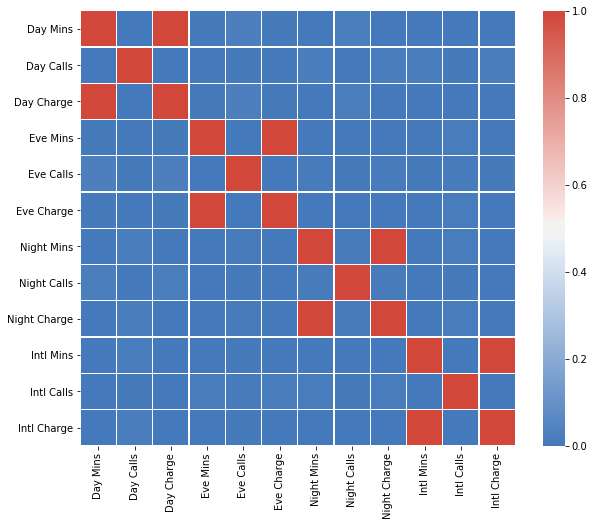

In [73]:
cor = d.corr()
f, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(250, 15, as_cmap=True) #related to colour shades




sns.heatmap(cor ,vmin = 0,vmax =1,cmap=cmap , square = True,linewidths=.25)

# CHECKING CORELATION USING VIF

In [77]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif["features"] = d.columns

In [112]:
vif.round(1)

,VIF Factor,features
0,22.3,Day Calls
1,11.4,Day Charge
2,37305427.5,Eve Mins
3,22.5,Eve Calls
4,37306231.3,Eve Charge
5,10730488.5,Night Mins
6,22.6,Night Calls
7,10730108.2,Night Charge
8,996092.3,Intl Mins
9,5.0,Intl Calls


From all the above three methods , it is evident that there is a strong corelation between Daymins- Daycharge & evemins - evecharge & nytmins-nytcharge so we element one feature/column

In [113]:
tele_df.drop(['Day Mins','Eve Mins','Night Mins','Intl Mins'] , axis =1)

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,OH,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,NJ,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,OH,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,OK,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.
5,AL,510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0,False.
6,MA,510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,False.
7,MO,415,yes,no,0,79,26.69,94,8.76,96,9.53,6,1.92,0,False.
8,LA,408,no,no,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False.
9,WV,415,yes,yes,37,84,43.96,111,18.87,97,14.69,5,3.02,0,False.


In [114]:
tele_df.shape

(3179, 19)

In [115]:
#seperated Target Variable or Dependent Variable
target_df = tele_df['Churn?']

In [116]:
tele_df = tele_df.drop('Churn?' , axis =1)

In [117]:
#Converting Categorical variables into model understandable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
tele_df['State'] =  labelencoder.fit_transform(tele_df['State'])

tele_df["Int'l Plan"]= labelencoder.fit_transform(tele_df["Int'l Plan"])
tele_df["VMail Plan"] = labelencoder.fit_transform(tele_df["VMail Plan"])



In [118]:
tele_df.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,16,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(tele_df, target_df, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (2225, 18)
x_test  (954, 18)
y_train  (2225,)
y_test  (954,)


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)



C:\Users\Shilpa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
model.coef_

array([[ 1.25331412e-03, -5.75000988e-03,  1.89638932e+00,
        -1.72373468e+00,  3.07848348e-02,  1.85062028e-02,
         1.54413460e-04, -3.19049008e-02,  6.27764051e-03,
        -4.39606271e-03, -1.94075633e-02,  1.17622003e-03,
        -4.63085233e-03,  1.41225501e-02,  7.22603398e-02,
        -1.23885848e-01,  4.23690062e-02,  4.42482232e-01]])

In [128]:
model.intercept_

array([-3.53101836])

In [132]:
model.score(x_train,y_train)

0.8660674157303371

In [131]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[796  19]
 [107  32]]


In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       815
       True.       0.63      0.23      0.34       139

   micro avg       0.87      0.87      0.87       954
   macro avg       0.75      0.60      0.63       954
weighted avg       0.84      0.87      0.84       954

